# Рассмотрим сделки по Образовательные услуги, с 2018 по 2022 год

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from os import listdir
from os.path import isfile, join

In [2]:
mypath=r'C:\Users\kerie\Scripts\Машинное обучение\CPK\ЦПК сделки'
names = [f for f in listdir(mypath) if isfile(join(mypath, f))]
len(names)
names

['2018.xlsx', '2019.xlsx', '2020.xlsx', '2021.xlsx', '2022.xlsx']

In [3]:
excl_list=[]
for i in names:
    file=f'{mypath}\{i}'
    data=pd.read_excel(file)
     # Год
    Year=i[:i.index('.')]
    data["Год_сделки"] = int(Year)
    excl_list.append(data)

In [4]:
data = pd.concat(excl_list)
data.shape

(33049, 20)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33049 entries, 0 to 6087
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Контрагент              33049 non-null  object        
 1   Номер                   33049 non-null  object        
 2   ДоговорКонтрагента      33049 non-null  object        
 3   СуммаДокумента          33049 non-null  float64       
 4   чдДатаПервойОплаты      33049 non-null  datetime64[ns]
 5   НаправлениеБизнеса      33049 non-null  object        
 6   Ссылка                  33049 non-null  object        
 7   ПометкаУдаления         33049 non-null  object        
 8   Код                     33049 non-null  int64         
 9   ИНН                     25502 non-null  object        
 10  Наименование            33049 non-null  object        
 11  ВидДеятельности         6967 non-null   object        
 12  ЮрФизЛицо               33049 non-null  object 

# Пустые строки:
- СистемаНалогообложения (21143);
- ВыручкаОтПродаж (17287).

# Выручка компаний 

In [6]:
print('Выручка клиентов из официальных источников')
print()
print(data['ВыручкаОтПродаж'].median(),'Медиана по выручке')
print(round(data['ВыручкаОтПродаж'].mean(),2),'Среднее значение по выручке')
print(data['ВыручкаОтПродаж'].max(),'Максимальное значение по выручке')
print(data['ВыручкаОтПродаж'].min(),'Минимальное значение по выручке')

Выручка клиентов из официальных источников

228110000.0 Медиана по выручке
12094627491.69 Среднее значение по выручке
6968248044000.0 Максимальное значение по выручке
0.0 Минимальное значение по выручке


In [7]:
quantile_15 = data['ВыручкаОтПродаж'].quantile(0.15)
quantile_20 = data['ВыручкаОтПродаж'].quantile(0.20)
quantile_25 = data['ВыручкаОтПродаж'].quantile(0.25)
median=data['ВыручкаОтПродаж'].median()
quantile_75 = data['ВыручкаОтПродаж'].quantile(0.75)

In [8]:
print('Квартили распределения')
print()
print(f'У 15% клиентов, у которых была сделка, \nвыручка меньше {quantile_15}\nа у 85% больше {quantile_15}')
print()
print()
print(f'У 20% клиентов, у которых была сделка, \nвыручка меньше {quantile_20}\nа у 80% больше {quantile_20}')
print()
print()
print(f'У 25% клиентов, у которых была сделка, \nвыручка меньше {quantile_25}\nа у 75% больше {quantile_25}')
print()
print()
print(f'У 50% клиентов, у которых была сделка, \nвыручка меньше {median}\nа у 50% больше {median}')
print()
print()
print(f'У 75% клиентов, у которых была сделка, \nвыручка меньше {quantile_75}\nа у 25% больше {quantile_75}')

Квартили распределения

У 15% клиентов, у которых была сделка, 
выручка меньше 21845050.0
а у 85% больше 21845050.0


У 20% клиентов, у которых была сделка, 
выручка меньше 35639000.00000001
а у 80% больше 35639000.00000001


У 25% клиентов, у которых была сделка, 
выручка меньше 52886250.0
а у 75% больше 52886250.0


У 50% клиентов, у которых была сделка, 
выручка меньше 228110000.0
а у 50% больше 228110000.0


У 75% клиентов, у которых была сделка, 
выручка меньше 975086000.0
а у 25% больше 975086000.0


# Анализ по системам налогообложения

In [9]:
# Заменим СистемаНалогообложения пустые значения на не известно 
data['СистемаНалогообложения'].fillna('Не известно', inplace=True)

In [10]:
data_n_cnt_y=data.groupby(['СистемаНалогообложения','Год_сделки'],as_index=False) \
.aggregate({'Код':"count",'СуммаДокумента':"sum"}) \
.rename(columns={"Код":"Количество сделок"}) \
.sort_values(by=['СистемаНалогообложения','Год_сделки'], ascending=False)

data_n_cnt_y['% Суммы Сделок']=round(data_n_cnt_y['СуммаДокумента']*100/data_n_cnt_y['СуммаДокумента'].sum(),1)
data_n_cnt_y['% Количества Сделок']=round(data_n_cnt_y['Количество сделок']*100/data_n_cnt_y['Количество сделок'].sum(),1)

data_n_cnt_y[['Год_сделки','СистемаНалогообложения','Количество сделок','% Количества Сделок','СуммаДокумента','% Суммы Сделок']]

,Год_сделки,СистемаНалогообложения,Количество сделок,% Количества Сделок,СуммаДокумента,% Суммы Сделок
49,2022,УСНО 6%,345,1.0,1.119151e+07,1.2
48,2021,УСНО 6%,341,1.0,9.560460e+06,1.0
47,2020,УСНО 6%,318,1.0,7.195745e+06,0.8
46,2019,УСНО 6%,435,1.3,1.082463e+07,1.1
45,2018,УСНО 6%,505,1.5,1.174734e+07,1.2
44,2022,УСНО 15%,121,0.4,3.110959e+06,0.3
43,2021,УСНО 15%,88,0.3,2.331555e+06,0.2
42,2020,УСНО 15%,116,0.4,2.367713e+06,0.2
41,2019,УСНО 15%,138,0.4,3.305774e+06,0.3
40,2018,УСНО 15%,154,0.5,3.011464e+06,0.3


In [11]:
data_n_cnt=data.groupby('СистемаНалогообложения',as_index=False) \
.aggregate({'Код':"count",'СуммаДокумента':"sum"}) \
.rename(columns={"Код":"Количество сделок"}) \
.sort_values(by='СуммаДокумента', ascending=False)

data_n_cnt['% Суммы Сделок']=round(data_n_cnt['СуммаДокумента']*100/data_n_cnt['СуммаДокумента'].sum(),1)
data_n_cnt['% Количества Сделок']=round(data_n_cnt['Количество сделок']*100/data_n_cnt['Количество сделок'].sum(),1)

data_n_cnt[['СистемаНалогообложения','Количество сделок','% Количества Сделок','СуммаДокумента','% Суммы Сделок']]

,СистемаНалогообложения,Количество сделок,% Количества Сделок,СуммаДокумента,% Суммы Сделок
4,Не известно,21143,64.0,5.891619e+08,62.1
5,ОСНО,6092,18.4,1.839596e+08,19.4
1,Бюджет,2240,6.8,8.318964e+07,8.8
9,УСНО 6%,1944,5.9,5.051968e+07,5.3
6,"ОСНО,УСНО",809,2.4,2.138326e+07,2.3
8,УСНО 15%,617,1.9,1.412747e+07,1.5
3,ЕСХН,83,0.3,2.281892e+06,0.2
2,ЕНВД,84,0.3,2.273943e+06,0.2
0,Аутсорсинг,22,0.1,1.083270e+06,0.1
7,Патент,15,0.0,2.955800e+05,0.0


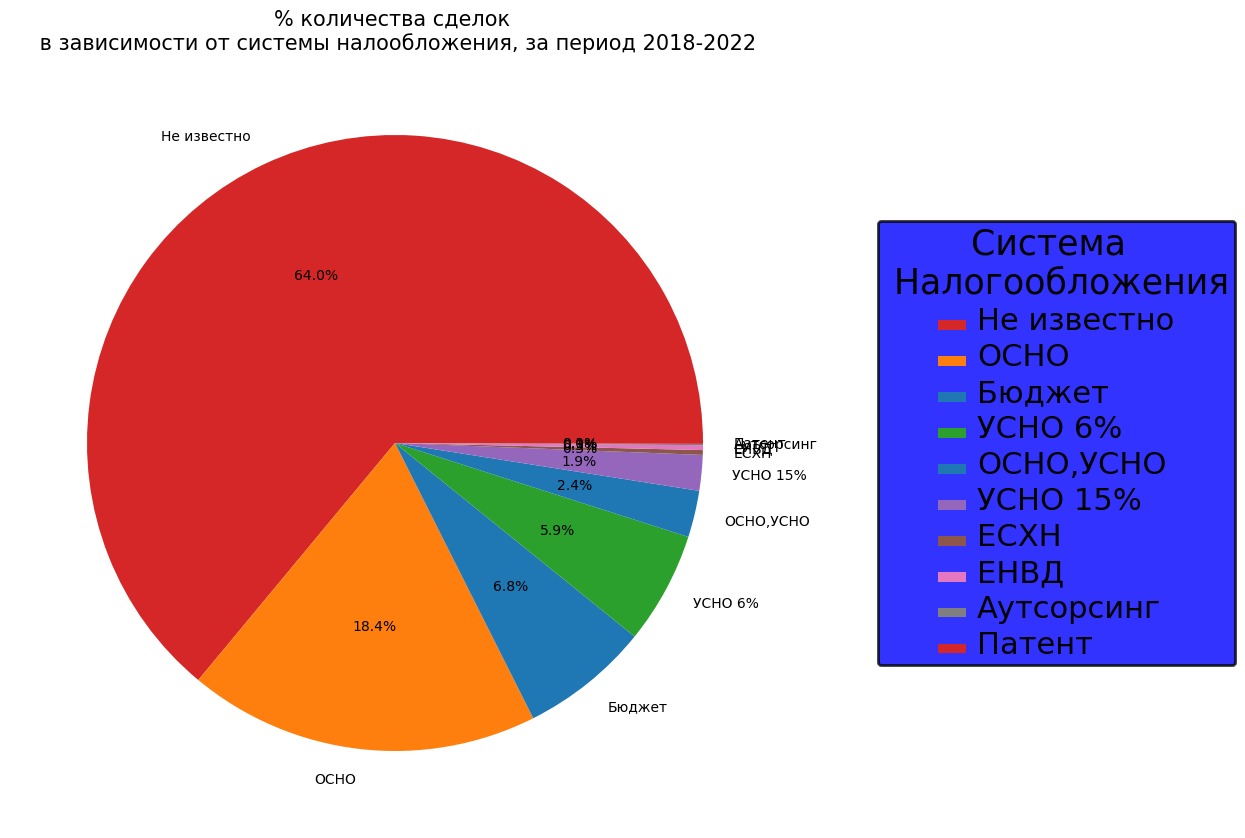

In [12]:
values = data_n_cnt['СистемаНалогообложения']

# Цвета секторов (можно настроить под ваши нужды)
colors = ['tab:red', 'tab:orange', 'tab:blue', 'tab:green', 'tab:blue', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray']

# Создание круговой диаграммы
fig, ax = plt.subplots(figsize=(10, 10))  # Установка размеров фигуры

ax.pie(data_n_cnt['Количество сделок'], labels=values, colors=colors, autopct='%1.1f%%')

legend = ax.legend(labels=values, title="        Система \n Налогообложения", 
                   loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))

legend.get_frame().set_edgecolor('black')  # Цвет рамки легенды
legend.get_frame().set_linewidth(2)  # Толщина линии рамки легенды
legend.get_frame().set_facecolor('Blue')  # Цвет фона легенды
legend.set_bbox_to_anchor((1.6, 0.5))  # Положение легенды

legend.get_title().set_fontsize(25)  # Размер заголовка легенды
for text in legend.get_texts():
    text.set_fontsize(22)  # Размер текста в легенде

plt.title("% количества сделок \n в зависимости от системы налообложения, за период 2018-2022", fontsize=15)

plt.show()

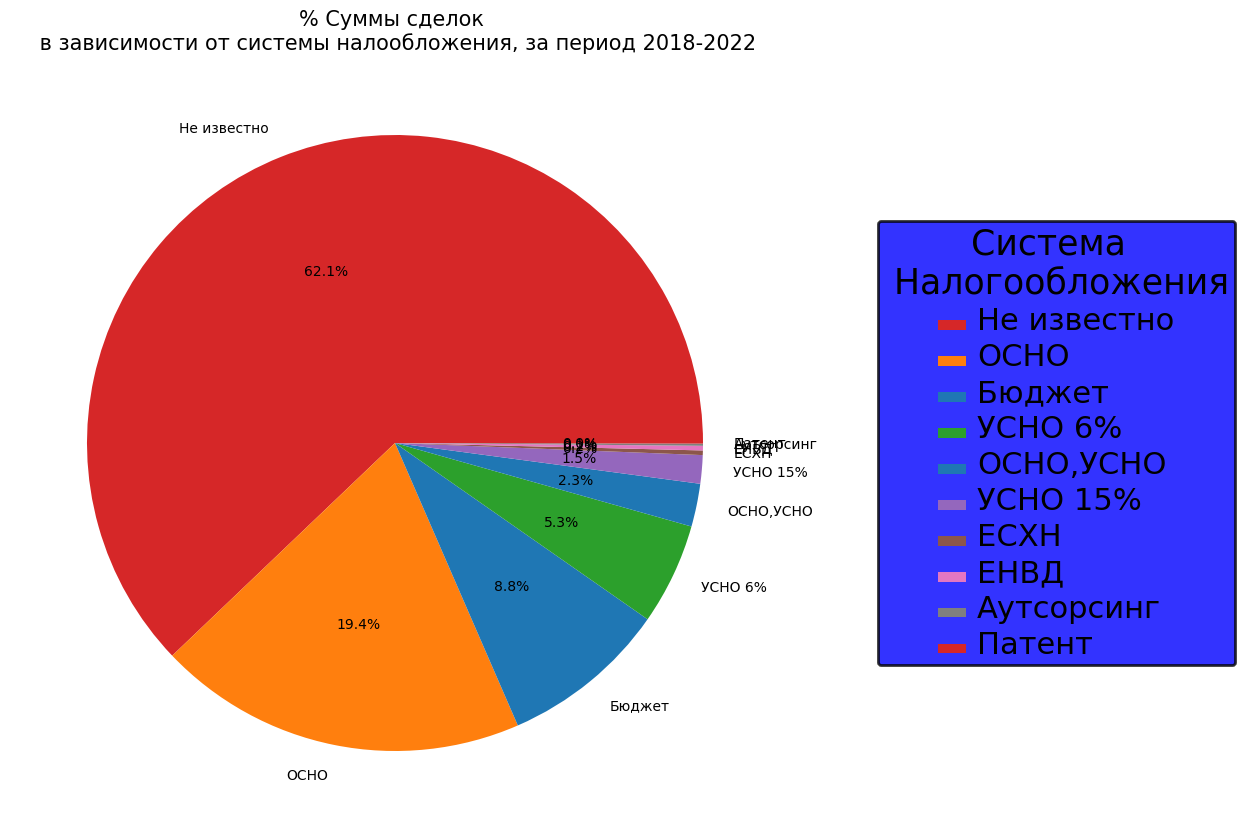

In [13]:
values = data_n_cnt['СистемаНалогообложения']

# Цвета секторов (можно настроить под ваши нужды)
colors = ['tab:red', 'tab:orange', 'tab:blue', 'tab:green', 'tab:blue', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray']

# Создание круговой диаграммы
fig, ax = plt.subplots(figsize=(10, 10))  # Установка размеров фигуры

ax.pie(data_n_cnt['СуммаДокумента'], labels=values, colors=colors, autopct='%1.1f%%')

legend = ax.legend(labels=values, title="        Система \n Налогообложения", 
                   loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))

legend.get_frame().set_edgecolor('black')  # Цвет рамки легенды
legend.get_frame().set_linewidth(2)  # Толщина линии рамки легенды
legend.get_frame().set_facecolor('Blue')  # Цвет фона легенды
legend.set_bbox_to_anchor((1.6, 0.5))  # Положение легенды

legend.get_title().set_fontsize(25)  # Размер заголовка легенды
for text in legend.get_texts():
    text.set_fontsize(22)  # Размер текста в легенде

plt.title("% Суммы сделок \n в зависимости от системы налообложения, за период 2018-2022", fontsize=15)

plt.show()

# Рассмотрим выручки компаний по 5 системам налогообложения

# Система Налогообложения ОСНО

In [14]:
osno=data.loc[((data['ВыручкаОтПродаж']>=0) & (data['СистемаНалогообложения']=='ОСНО'))]\
[['Код','СистемаНалогообложения','ВыручкаОтПродаж']] 
# Удаляем дубли
osno=osno.drop_duplicates ()

quantile_15 = osno['ВыручкаОтПродаж'].quantile(0.15)
quantile_20 = osno['ВыручкаОтПродаж'].quantile(0.20)
quantile_25 = osno['ВыручкаОтПродаж'].quantile(0.25)
median=osno['ВыручкаОтПродаж'].median()
quantile_75 = osno['ВыручкаОтПродаж'].quantile(0.75)

In [15]:
print('Квартили распределения системы налогообложения ОСНО')
print()
print(f'У 15% клиентов, у которых была сделка, \nвыручка меньше {quantile_15}\nа у 85% больше {quantile_15}')
print()
print()
print(f'У 20% клиентов, у которых была сделка, \nвыручка меньше {quantile_20}\nа у 80% больше {quantile_20}')
print()
print()
print(f'У 25% клиентов, у которых была сделка, \nвыручка меньше {quantile_25}\nа у 75% больше {quantile_25}')
print()
print()
print(f'У 50% клиентов, у которых была сделка, \nвыручка меньше {median}\nа у 50% больше {median}')
print()
print()
print(f'У 75% клиентов, у которых была сделка, \nвыручка меньше {quantile_75}\nа у 25% больше {quantile_75}')

Квартили распределения системы налогообложения ОСНО

У 15% клиентов, у которых была сделка, 
выручка меньше 47318500.0
а у 85% больше 47318500.0


У 20% клиентов, у которых была сделка, 
выручка меньше 69667400.00000001
а у 80% больше 69667400.00000001


У 25% клиентов, у которых была сделка, 
выручка меньше 97100500.0
а у 75% больше 97100500.0


У 50% клиентов, у которых была сделка, 
выручка меньше 335372000.0
а у 50% больше 335372000.0


У 75% клиентов, у которых была сделка, 
выручка меньше 1113729750.0
а у 25% больше 1113729750.0


# Система Налогообложения Бюджет

In [16]:
b=data.loc[((data['ВыручкаОтПродаж']>=0) & (data['СистемаНалогообложения']=='Бюджет'))]\
[['Код','СистемаНалогообложения','ВыручкаОтПродаж']] 
# Удаляем дубли
b=b.drop_duplicates ()

quantile_15 = b['ВыручкаОтПродаж'].quantile(0.15)
quantile_20 = b['ВыручкаОтПродаж'].quantile(0.20)
quantile_25 = b['ВыручкаОтПродаж'].quantile(0.25)
median=b['ВыручкаОтПродаж'].median()
quantile_75 = b['ВыручкаОтПродаж'].quantile(0.75)

In [17]:
print('Квартили распределения системы налогообложения Бюджет')
print()
print(f'У 15% клиентов, у которых была сделка, \nвыручка меньше {quantile_15}\nа у 85% больше {quantile_15}')
print()
print()
print(f'У 20% клиентов, у которых была сделка, \nвыручка меньше {quantile_20}\nа у 80% больше {quantile_20}')
print()
print()
print(f'У 25% клиентов, у которых была сделка, \nвыручка меньше {quantile_25}\nа у 75% больше {quantile_25}')
print()
print()
print(f'У 50% клиентов, у которых была сделка, \nвыручка меньше {median}\nа у 50% больше {median}')
print()
print()
print(f'У 75% клиентов, у которых была сделка, \nвыручка меньше {quantile_75}\nа у 25% больше {quantile_75}')

Квартили распределения системы налогообложения Бюджет

У 15% клиентов, у которых была сделка, 
выручка меньше 0.0
а у 85% больше 0.0


У 20% клиентов, у которых была сделка, 
выручка меньше 20207800.000000004
а у 80% больше 20207800.000000004


У 25% клиентов, у которых была сделка, 
выручка меньше 30891250.0
а у 75% больше 30891250.0


У 50% клиентов, у которых была сделка, 
выручка меньше 452983000.0
а у 50% больше 452983000.0


У 75% клиентов, у которых была сделка, 
выручка меньше 16000113000.0
а у 25% больше 16000113000.0


# Система Налогообложения УСНО 6%

In [18]:
usno_6=data.loc[((data['ВыручкаОтПродаж']>=0) & (data['СистемаНалогообложения']=='УСНО 6%'))]\
[['Код','СистемаНалогообложения','ВыручкаОтПродаж']] 

# Удаляем дубли
usno_6=usno_6.drop_duplicates ()

quantile_15 = usno_6['ВыручкаОтПродаж'].quantile(0.15)
quantile_20 = usno_6['ВыручкаОтПродаж'].quantile(0.20)
quantile_25 = usno_6['ВыручкаОтПродаж'].quantile(0.25)
median=usno_6['ВыручкаОтПродаж'].median()
quantile_75 =usno_6['ВыручкаОтПродаж'].quantile(0.75)

In [19]:
print('Квартили распределения системы налогообложения УСНО 6%')
print()
print(f'У 15% клиентов, у которых была сделка, \nвыручка меньше {quantile_15}\nа у 85% больше {quantile_15}')
print()
print()
print(f'У 20% клиентов, у которых была сделка, \nвыручка меньше {quantile_20}\nа у 80% больше {quantile_20}')
print()
print()
print(f'У 25% клиентов, у которых была сделка, \nвыручка меньше {quantile_25}\nа у 75% больше {quantile_25}')
print()
print()
print(f'У 50% клиентов, у которых была сделка, \nвыручка меньше {median}\nа у 50% больше {median}')
print()
print()
print(f'У 75% клиентов, у которых была сделка, \nвыручка меньше {quantile_75}\nа у 25% больше {quantile_75}')

Квартили распределения системы налогообложения УСНО 6%

У 15% клиентов, у которых была сделка, 
выручка меньше 6738500.0
а у 85% больше 6738500.0


У 20% клиентов, у которых была сделка, 
выручка меньше 9087000.0
а у 80% больше 9087000.0


У 25% клиентов, у которых была сделка, 
выручка меньше 12411750.0
а у 75% больше 12411750.0


У 50% клиентов, у которых была сделка, 
выручка меньше 31660500.0
а у 50% больше 31660500.0


У 75% клиентов, у которых была сделка, 
выручка меньше 74431250.0
а у 25% больше 74431250.0


# Система Налогообложения ОСНО,УСНО

In [20]:
ou=data.loc[((data['ВыручкаОтПродаж']>=0) & (data['СистемаНалогообложения']=='ОСНО,УСНО'))]\
[['Код','СистемаНалогообложения','ВыручкаОтПродаж']] 

# Удаляем дубли
ou=ou.drop_duplicates ()

quantile_15 = ou['ВыручкаОтПродаж'].quantile(0.15)
quantile_20 = ou['ВыручкаОтПродаж'].quantile(0.20)
quantile_25 = ou['ВыручкаОтПродаж'].quantile(0.25)
median=ou['ВыручкаОтПродаж'].median()
quantile_75 =ou['ВыручкаОтПродаж'].quantile(0.75)

In [21]:
print('Квартили распределения системы налогообложения ОСНО,УСНО')
print()
print(f'У 15% клиентов, у которых была сделка, \nвыручка меньше {quantile_15}\nа у 85% больше {quantile_15}')
print()
print()
print(f'У 20% клиентов, у которых была сделка, \nвыручка меньше {quantile_20}\nа у 80% больше {quantile_20}')
print()
print()
print(f'У 25% клиентов, у которых была сделка, \nвыручка меньше {quantile_25}\nа у 75% больше {quantile_25}')
print()
print()
print(f'У 50% клиентов, у которых была сделка, \nвыручка меньше {median}\nа у 50% больше {median}')
print()
print()
print(f'У 75% клиентов, у которых была сделка, \nвыручка меньше {quantile_75}\nа у 25% больше {quantile_75}')

Квартили распределения системы налогообложения ОСНО,УСНО

У 15% клиентов, у которых была сделка, 
выручка меньше 13152000.0
а у 85% больше 13152000.0


У 20% клиентов, у которых была сделка, 
выручка меньше 22340600.0
а у 80% больше 22340600.0


У 25% клиентов, у которых была сделка, 
выручка меньше 32029750.0
а у 75% больше 32029750.0


У 50% клиентов, у которых была сделка, 
выручка меньше 156528000.0
а у 50% больше 156528000.0


У 75% клиентов, у которых была сделка, 
выручка меньше 661132750.0
а у 25% больше 661132750.0


# Система Налогообложения УСНО 15%

In [22]:
usno_15=data.loc[((data['ВыручкаОтПродаж']>=0) & (data['СистемаНалогообложения']=='УСНО 15%'))]\
[['Код','СистемаНалогообложения','ВыручкаОтПродаж']] 

# Удаляем дубли
usno_15=usno_15.drop_duplicates ()

quantile_15 = usno_15['ВыручкаОтПродаж'].quantile(0.15)
quantile_20 = usno_15['ВыручкаОтПродаж'].quantile(0.20)
quantile_25 = usno_15['ВыручкаОтПродаж'].quantile(0.25)
median=usno_15['ВыручкаОтПродаж'].median()
quantile_75 =usno_15['ВыручкаОтПродаж'].quantile(0.75)

In [23]:
print('Квартили распределения системы налогообложения УСНО 15%')
print()
print(f'У 15% клиентов, у которых была сделка, \nвыручка меньше {quantile_15}\nа у 85% больше {quantile_15}')
print()
print()
print(f'У 20% клиентов, у которых была сделка, \nвыручка меньше {quantile_20}\nа у 80% больше {quantile_20}')
print()
print()
print(f'У 25% клиентов, у которых была сделка, \nвыручка меньше {quantile_25}\nа у 75% больше {quantile_25}')
print()
print()
print(f'У 50% клиентов, у которых была сделка, \nвыручка меньше {median}\nа у 50% больше {median}')
print()
print()
print(f'У 75% клиентов, у которых была сделка, \nвыручка меньше {quantile_75}\nа у 25% больше {quantile_75}')

Квартили распределения системы налогообложения УСНО 15%

У 15% клиентов, у которых была сделка, 
выручка меньше 5872000.0
а у 85% больше 5872000.0


У 20% клиентов, у которых была сделка, 
выручка меньше 8447000.0
а у 80% больше 8447000.0


У 25% клиентов, у которых была сделка, 
выручка меньше 13602000.0
а у 75% больше 13602000.0


У 50% клиентов, у которых была сделка, 
выручка меньше 38326000.0
а у 50% больше 38326000.0


У 75% клиентов, у которых была сделка, 
выручка меньше 90824250.0
а у 25% больше 90824250.0


# Вывод
- Системы налогообложения в порядке приоритета:
- а) ОСНО выручка компаний от 40 млн;
- b) Бюджет выручка компаний от 20 млн;
- c) УСНО 6% выручка компаний от 6 млн.
- d) ОСНО,УСНО выручка компаний от 13 млн.
- e) УСНО 15% выручка компаний от 5 млн.